<img src = "https://imgur.com/HE0kDhA.jpg"  align = "center">

# Model Deployment

Kita telah belajar banyak hal tentang machine learning dari mulai membuat model neural network sederhana, membuat arsitektur model CNN sederhana dan menggunakan beberapa teknik penanganan overfitting model. Namun pernahkan anda berpikir apa yang akan kita dilakukan setelah model machine learning dilatih? Bagaimana cara menggunakannya dalam aplikasi yang dapat dipakai oleh banyak orang? Dapatkah model machine learning dijalankan pada platform aplikasi web, mobile dan jenis perangkat keras lainnya?.

Jawabannya adalah **BISA**, pada sesi kali ini kita akan belajar bagaimana menjalankan model machine learning untuk mengklasifikasikan gambar menggunakan platform website berbasis python. Kita akan menggunakan flask framework untuk membangun website sederhana untuk mengklasifikasikan gambar. 

Sebelumnya dalam modul 2 kita telah belajar melakukan prediksi dengan sebuah gambar baru yang kita upload kedalam google colab. Kemudian pada modul 3 dan 4 kita telah belajar melakukan prediksi dengan beberapa input gambar dan menyimpan model yang telah kita latih kedalam file berekstensi `h5`. Pada latihan kali ini kita akan menggunakan model `h5` tersebut untuk kita jalankan dalam sebuah aplikasi berbasi web sederhana. 

**NOTE:** kita akan menggunakan model `h5` dalam modul 4.

## **PENTING**

Perhatikan instruksi dan penjelasan dibawah ini untuk dapat memahami tata cara melakukan deploy model machine learning menggunakan flask framework.


*   Gunakan anaconda atau python versi 3
*   Download contoh deployment program [disini](https://github.com/chamisfum/ML_Production.git).
*   Buat virtual evironment dengan perintah `conda create -n myenv python=3` kemudian `conda activate myenv` untuk anaconda 
*   Atau gunakan command `pip install virtualenv` kemudian `virtualenv myenv` lalu `\myenv\Scripts\activate` untuk membuat virtual env dengan python 3
*   Install requirement file dengan `pip install - r requirements.txt`
*   Masuk kedalam folder project
*   Jalankan dengan perintah `python main.py`
*   Buka browser dan masukkan alamat `127.0.0.1:2000`
*   Input gambar cat atau dog random dalam input form kemudian click execute.
*   Hasil prediksi akan ditampilkan seperti pada contoh.
*   Hasil prediksi menampilkan nilai akurasi prediksi, label kelas, dan lama waktu prediksi.



### **Tampilan `127.0.0.1:2000`**

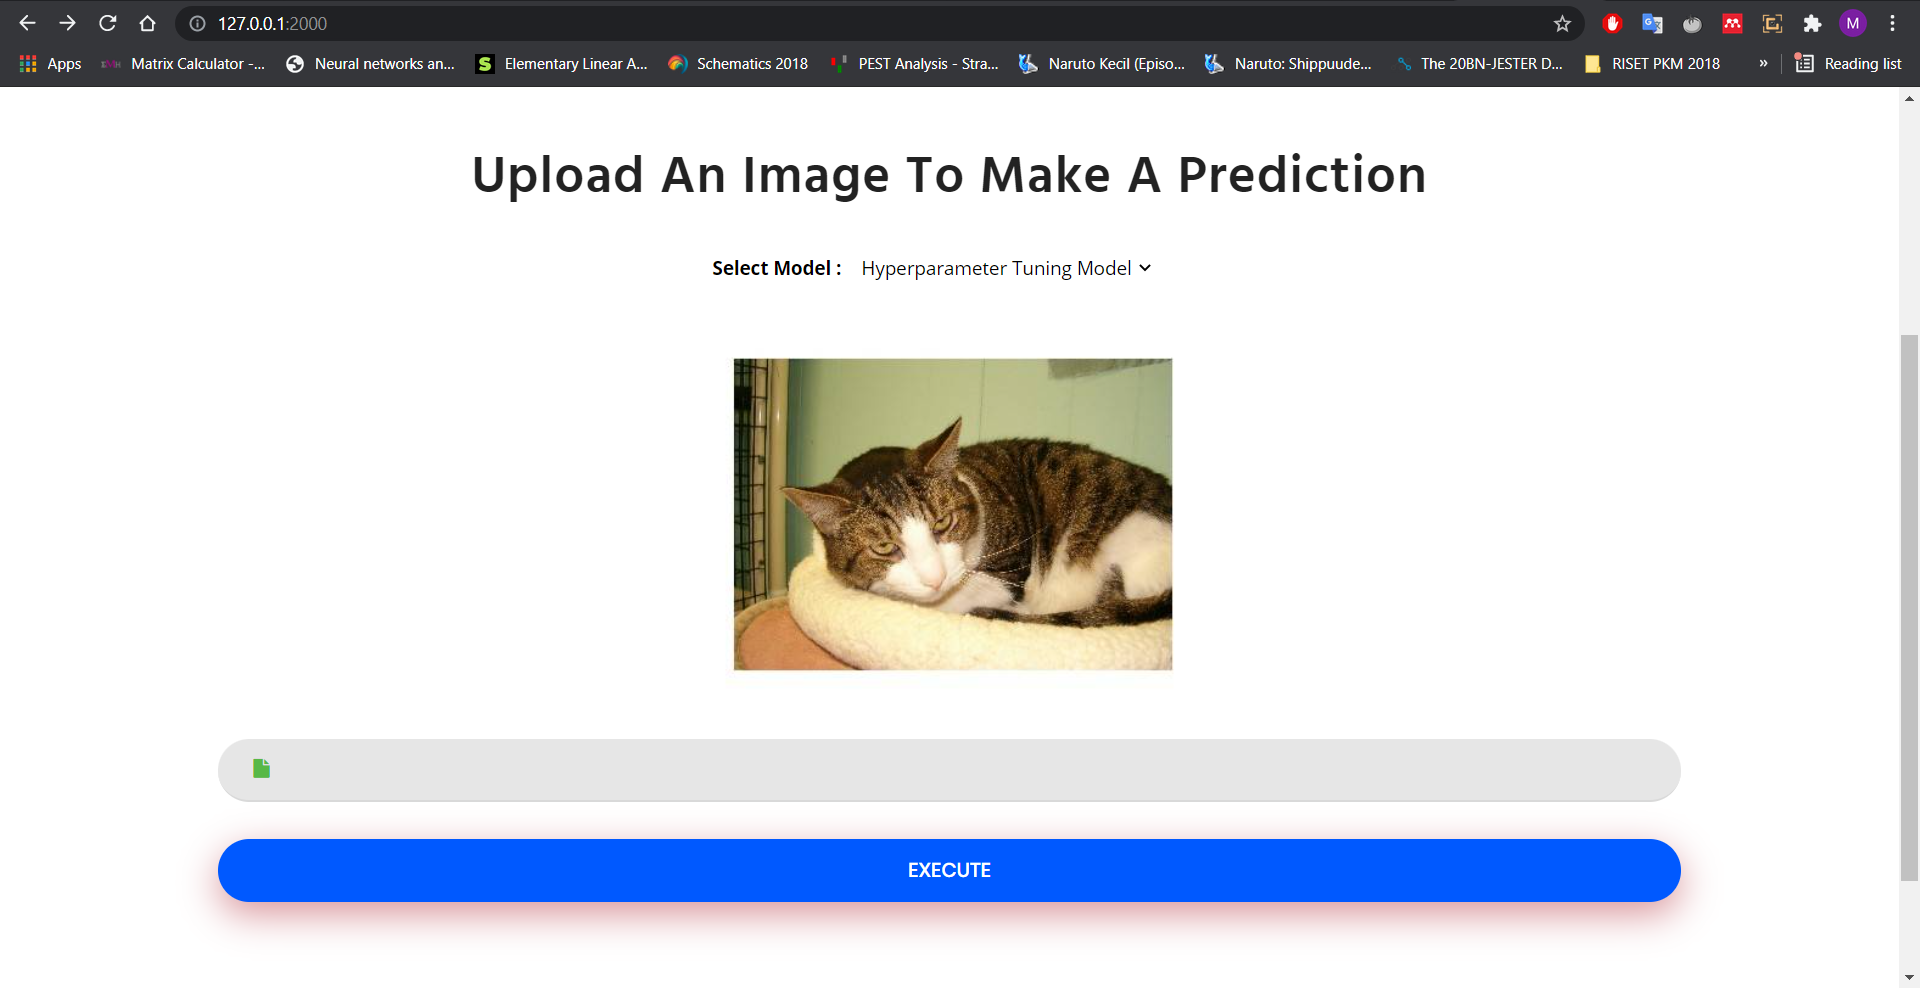

### **Hasil setelah tombol execute ditekan**

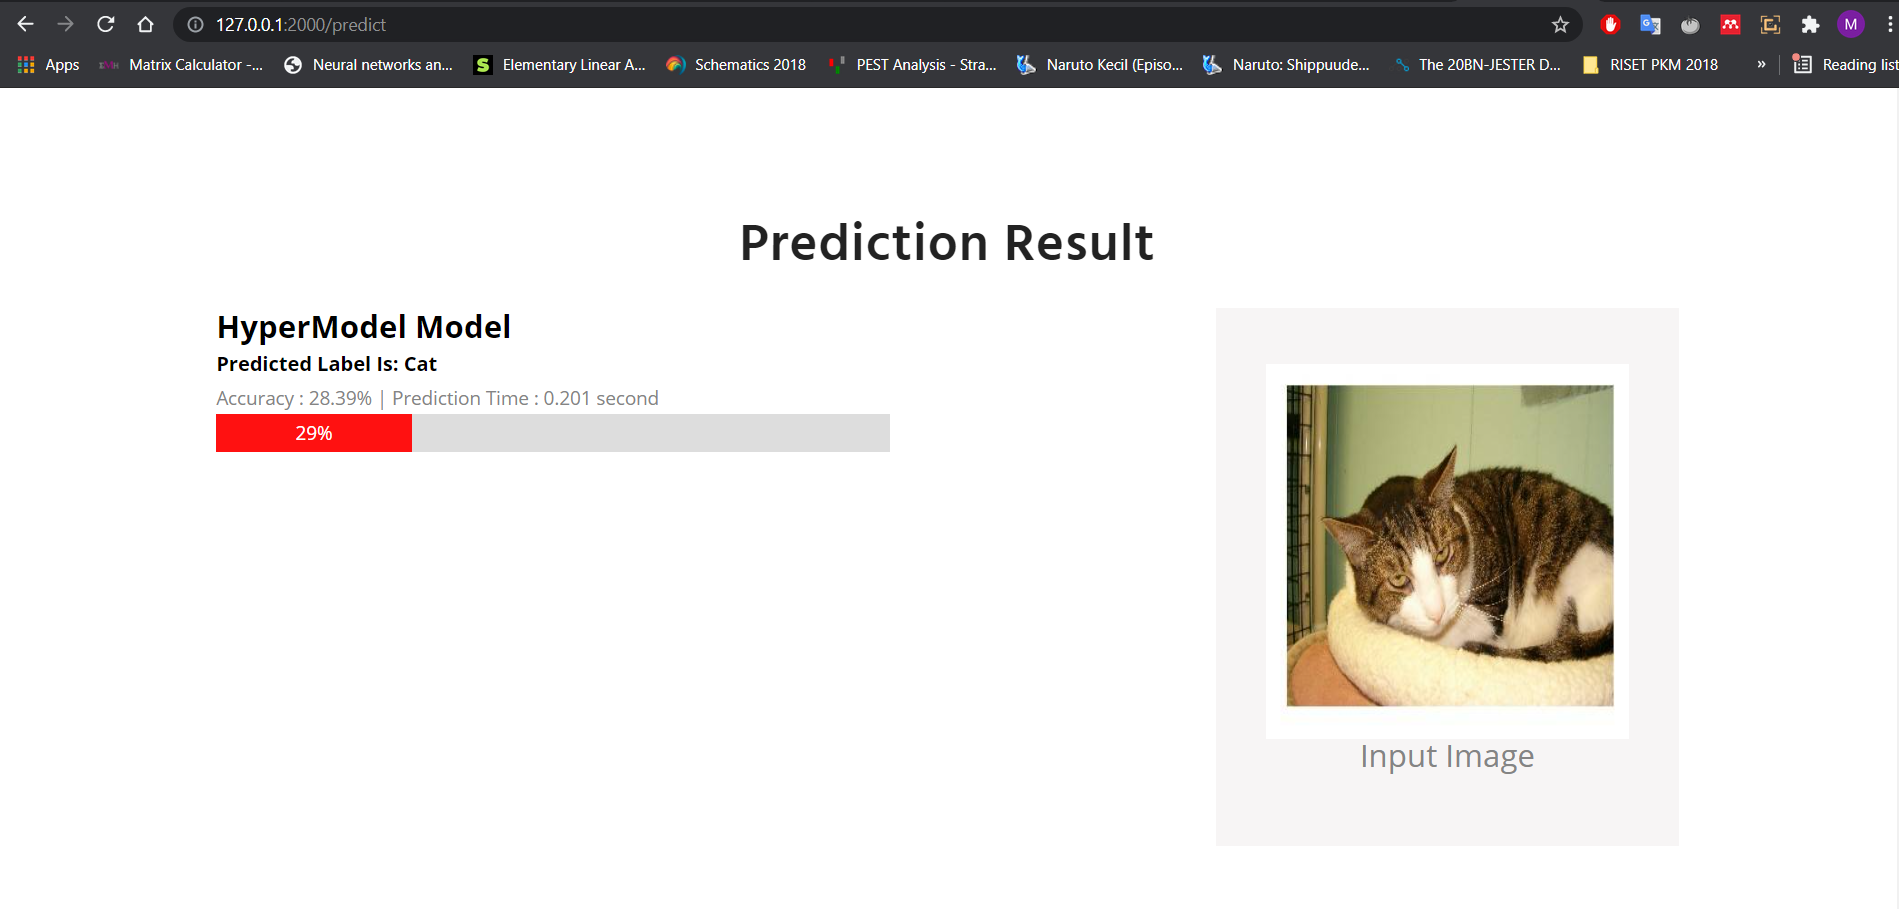

## **Implementasi Model Deployment**

**NOTE:** Anda tidak perlu menjalankan kode program dibawah ini pada google colab atau jupyter notebook. Anda hanya perlu memahami program dari contoh deployement yang sudah diberikan. Dan kamu bisa menjalankannya sesuai arahan yang telah ditunjukkan sebelumnya.

### **Import paket**

```python
import time
import os
import cv2
import numpy as np
from PIL import Image
from flask import Flask, request, redirect, render_template
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
```



### **Definisikan flask config**


```python
ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}
app = Flask(__name__)
UPLOAD_FOLDER = 'static/uploads/'
app.config['MAX_CONTENT_LENGTH'] = 10 * 1024 * 1024

@app.after_request
def add_header(r):
    r.headers["Cache-Control"] = "no-cache, no-store, must-revalidate"
    r.headers["Pragma"] = "no-cache"
    r.headers["Expires"] = "0"
    r.headers['Cache-Control'] = 'public, max-age=0'
    return r
```



### **Membuat home route**



```python
@app.route("/")
def index():
    return render_template('/select.html', )
```



### **Melakukan prediksi gambar**



```python
@app.route('/predict', methods=['POST'])
def predict():
    chosen_model = request.form['select_model']
    model_dict = {'hyperModel'   :   'static/MLModule/hyperModel.h5',
                  'LRSModel'     :   'static/MLModule/LRSModel.h5',}
    if chosen_model in model_dict:
        model = load_model(model_dict[chosen_model]) 
    else:
        model = load_model(model_dict[0])
    file = request.files["file"]
    file.save(os.path.join('static', 'temp.jpg'))
    img = cv2.cvtColor(np.array(Image.open(file)), cv2.COLOR_BGR2RGB)
    img = np.expand_dims(cv2.resize(img, model.layers[0].input_shape[0][1:3] \ 
    if not model.layers[0].input_shape[1:3] else model.layers[0].input_shape \
    [1:3]).astype('float32') / 255, axis=0)
    start = time.time()
    pred = model.predict(img)[0]
    labels = (pred > 0.5).astype(np.int)
    print(labels)
    runtimes = round(time.time()-start,4)
    respon_model = [round(elem * 100, 2) for elem in pred]
    return predict_result(chosen_model, runtimes, respon_model, 'temp.jpg')
```



### **Menampilkan hasil prediksi gambar**

```python
def predict_result(model, run_time, probs, img):
    class_list = {'Cat': 0, 'Dog': 1}
    idx_pred = probs.index(max(probs))
    labels = list(class_list.keys())
    return render_template('/result_select.html', labels=labels, 
                            probs=probs, model=model, pred=idx_pred, 
                            run_time=run_time, img=img)
```



```python
if __name__ == "__main__": 
        app.run(debug=True, host='0.0.0.0', port=2000)
```



### **Kode html untuk upload gambar**



```html
    <!-- form-section -->
    <section class="contact-section" style="padding-top:50px;" id="predict1">
        <div class="container">
            <div class="title-box centred" >
                <div class="sec-title">Upload an Image to Make a Prediction</div>
            </div>
            <form class="login100-form validate-form" action="/predict" method=post enctype=multipart/form-data>
                <div class="row" style=" width: 35%; margin: auto; padding: 15px;" >
                    <div class="column" >
                        <div class="form-check form-check-inline">
                            <p style="font-weight: bold; color: black;">Select Model : </p>
                        </div>   
                    </div>
                    <div class="column" >
                        <div class="form-check form-check-inline"> 
                            <select name="select_model" id="selected_model">
                                <option value='hyperModel' >Hyperparameter Tuning Model  </option>
                                <option value='LRSModel'   >Learning Rate Scheduler Model    </option>
                            </select>
                        </div>   
                    </div>
                </div>
                <img id="image-preview" alt="image preview" src="#" style="width: 35%;"/>
                <div class="container-login100-form-btn">
                    <div class="wrap-input100 validate-input" data-validate="Image file is required" id="input">
                        <input class="input100" id="image-source" name="file" onchange="previewImage();" type="file"
                            alt="Input Image" accept="image/jpeg,image/jpg,image/png">
                        <span class="focus-input100"></span>
                        <span class="symbol-input100">
                            <i class="fa fa-file" aria-hidden="true"></i>
                        </span>
                    </div>
                </div>
                <div class="container-login100-form-btn">
                    <button class="login100-form-btn" type="submit">
                        Execute
                    </button>
                </div>
            </form>
        </div>
    </section>
    <!-- form-section end -->
```



### **Kode html untuk menampilkan hasil prediksi**



```html
    <!-- Table-section -->
    <section class="contact-section" id="result" style="padding-bottom: 50px;">
        <div class="container">
            <div class="title-box centred" style="padding-top: 5px; padding-bottom: 5px;">
                <div class="sec-title">Prediction Result</div>
            </div>
            <div class="row" >
                <div class="col-lg-8 col-md-12 col-sm-12 content-column">
                    <div class="inner-content">
                        <div class="contact-form-area">
                            <p style="margin: unset; padding: none; color: black; text-transform: capitalize; font-size: 25px; font-weight: bold;">{{ model }} Model</p> 
                            <p style="margin: unset; padding: none; color: black; text-transform: capitalize; font-size: medium; font-weight: bold;"> Predicted Label is: {{ labels[pred] }}</p> 
                            Accuracy : {{ (probs|max) }}% | Prediction Time : {{ (run_time) }} second
                            <input type="hidden" id="probability" value={{(probs|max)}}> 
                            <div id="myProgress">
                                <div id="myBar">0%</div>
                            </div> 
                        </div>
                    </div>
                </div>
                <div class="col-lg-4 col-md-12 col-sm-12 sidebar-column">
                    <div class="sidebar-content">
                        <img src="{{ url_for('static', filename=img) }}" alt="" class="img-fluid" style="height:300px; width:300px;">
                        <p style="font-size:25px;text-align:center;">Input Image</p>
                    </div>
                </div>
            </div>
        </div>
    </section>
    <!-- final-section end -->
```

